# Proyecto A.0 - Introducción a las Herramientas de Análisis y Reportes

Alan Badillo Salas (badillo.soft@hotmail.com)

Antes de empezar con algún proyecto como el `A.1`, `A.2`, `A.3` o `A.4` resuelve los siguientes pasos para poder construir los reportes.

## Adquisición de los Datos

Del repositorio de datasets de la UCI ingresa al dataset `Adult` (https://archive.ics.uci.edu/ml/datasets/Adult) y descarga el archivo csv de datos `adult.data` (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

In [58]:
import pandas as pd

# TODO: Crea una lista con las columnas
# `Edad`, `Tipo-Trabajo`, `Densidad-Poblacion`, `Grado-Educativo`, `Nivel-Educativo`,
# `Estado-Civil`, `Ocupacion`, `Relacion-Sentimental`, `Raza`, `Sexo`,
# `Capital-Ganado`, `Capital-Perdido`, `Horas-Tabrajo`, `Pais-Nativo`, `Ingreso-50k`
columnas = [
    "Edad", "Tipo-Trabajo", "Densidad-Poblacion", "Grado-Educativo",
    "Estado-Civil", "Nivel-Educativo", "Ocupacion", "Relacion-Sentimental",
    "Raza", "Sexo", "Capital-Ganado", "Capital-Perdido", 
    "Horas-Tabrajo", "Pais-Nativo", "Ingreso-50k"
]

# TODO: Carga los datos del CSV definiendo las columnas como cabeceras
data = pd.read_csv("adult.data.csv", sep=", ", names=columnas).dropna()

data.head()

/Users/dragon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,Edad,Tipo-Trabajo,Densidad-Poblacion,Grado-Educativo,Estado-Civil,Nivel-Educativo,Ocupacion,Relacion-Sentimental,Raza,Sexo,Capital-Ganado,Capital-Perdido,Horas-Tabrajo,Pais-Nativo,Ingreso-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Estructuración de los datos

Codifica cada columna como `Edad-Cat`, `Nivel-Educativo-Cat`, etc. La codificación a cada columna se va a especificar mediante la pertencia a los respectivos rangos, es decir, para la edad, será de la categoría `A` si está en el rango de entre `18-22` años, etc. Las columnas de interés para nuestro estudio serán:

* `Edad`:
    * A: 18 - 22
    * B: 23 - 29
    * C: 30 - 35
    * D: 36 - 40
    * E: 41 - 49
    * F: 50 - 64
    * G: 65 +
* `Nivel-Educativo`
    * A: 1 - 8
    * B: 9 - 12
    * C: 13 =
    * D: 14 - 15
    * E: 16 +
* `Estado-Civil`
    * A: Divorce | Separated
    * B: Windowed | Married-spouse-absent
    * C: Never-married
    * D: Married-civ-spouse | Married-AF-spouse
* `Relacion-Sentimental`
    * A: Wife | Husband
    * B: No-in-family
    * C: Own-child
* `Raza`
    * A: Black
    * B: White
    * C: Asian-Pac-Islander | Amer-Indian-Eskimo | Other
* `Sexo`
    * A: Female
    * B: Male
* `Horas-Tabrajo` 
    * A: 0 - 29
    * B: 30 - 39
    * C: 40 - 45
    * D: 46 - 55
    * E: 56 +
* `Pais-Nativo` (ajustar de acuerdo al ranking mundial https://www.usnews.com/news/best-countries/overall-rankings)
    * A: TOP 25
    * B: TOP 50
    * C: Otros
* `Ingreso-50k`



In [59]:
def EdadToCat(edad):
    if edad >= 18 and edad <= 22:
        return "A"
    elif edad >= 23 and edad <= 29:
        return "B"
    elif edad >= 30 and edad <= 35:
        return "C"
    elif edad >= 36 and edad <= 39:
        return "D"
    elif edad >= 40 and edad <= 49:
        return "E"
    elif edad >= 50 and edad <= 64:
        return "F"
    elif edad >= 65:
        return "G"
    else:
        return "X"
    
def SexToCat(sexo):
    if sexo == "Female":
        return "A"
    elif sexo == "Male":
        return "B"
    else:
        return "X"
    
data["EdadCat"] = data["Edad"].map(EdadToCat)
data["SexoCat"] = data["Sexo"].map(SexToCat)

data.sample(5)

,Edad,Tipo-Trabajo,Densidad-Poblacion,Grado-Educativo,Estado-Civil,Nivel-Educativo,Ocupacion,Relacion-Sentimental,Raza,Sexo,Capital-Ganado,Capital-Perdido,Horas-Tabrajo,Pais-Nativo,Ingreso-50k,EdadCat,SexoCat
6162,28,Private,179512,HS-grad,9,Separated,Exec-managerial,Unmarried,White,Female,0,0,50,United-States,<=50K,B,A
25943,19,Private,277695,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Hong,<=50K,A,B
13194,37,Private,167735,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,40,United-States,>50K,D,B
8177,39,Private,224531,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K,D,B
15037,46,Self-emp-not-inc,275625,Bachelors,13,Divorced,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,60,South,>50K,E,A


## Procesamiento de los datos

Por cada categoría construir una tabla de reporte (un dataframe) que contenga la categoría, el rango de la categoría (o la condición de pertenencia), el número de filas (registros) con esa categoría, el total de filas y el porcentaje.

In [46]:
import pandas as pd

columns = ["Categoria", "Condicion", "Conteo", "Total", "Porcentaje"]

edad_A = len(data.query("EdadCat == 'A'"))
edad_B = len(data.query("EdadCat == 'B'"))
edad_C = len(data.query("EdadCat == 'C'"))
edad_D = len(data.query("EdadCat == 'D'"))
edad_E = len(data.query("EdadCat == 'E'"))
edad_F = len(data.query("EdadCat == 'F'"))
edad_G = len(data.query("EdadCat == 'G'"))

total = edad_A + edad_B + edad_C + edad_D + edad_E + edad_F + edad_G

datos = [
    ["A", "18-22", edad_A, total, "{:.2f}%".format(100 * edad_A / total)],
    ["B", "23-29", edad_B, total, "{:.2f}%".format(100 * edad_B / total)],
    ["C", "30-35", edad_C, total, "{:.2f}%".format(100 * edad_C / total)],
    ["D", "36-39", edad_D, total, "{:.2f}%".format(100 * edad_D / total)],
    ["E", "40-49", edad_E, total, "{:.2f}%".format(100 * edad_E / total)],
    ["F", "50-64", edad_F, total, "{:.2f}%".format(100 * edad_F / total)],
    ["G", "65+", edad_G, total, "{:.2f}%".format(100 * edad_G / total)],
]

reporte_edad = pd.DataFrame(datos, columns=columns)

reporte_edad

,Categoria,Condicion,Conteo,Total,Porcentaje
0,A,18-22,3500,32166,10.88%
1,B,23-29,5816,32166,18.08%
2,C,30-35,5214,32166,16.21%
3,D,36-39,3399,32166,10.57%
4,E,40-49,7175,32166,22.31%
5,F,50-64,5726,32166,17.80%
6,G,65+,1336,32166,4.15%


## Visualización de los datos

Vamos a mostrar para cada reporte construir una gráfica de pie y una de barras.

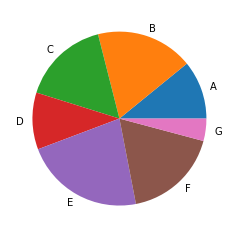

In [44]:
import matplotlib.pyplot as plt

plt.pie(reporte_edad["Conteo"], labels=reporte_edad["Categoria"])
plt.show()

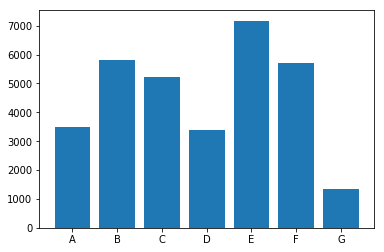

In [45]:
import matplotlib.pyplot as plt

plt.bar(reporte_edad["Categoria"], reporte_edad["Conteo"])
plt.show()